In [3]:
import PIL.Image
import numpy as np
from typing import Union
from glob import glob
import os

# [IAPR][iapr]: Project


**Group ID:** 2

**Author 1 (sciper):** Camille Delgrange (282250)  
**Author 2 (sciper):** Chiara Matti (350647)   
**Author 3 (sciper):** Linda Delacombaz (288415)   

**Release date:** 27.04.2023


## Important notes

The assignments are designed to teach practical implementation of the topics presented during class as well as preparation for the final project, which is a practical project which ties together the topics of the course. 

As such, in the lab assignments/final project, unless otherwise specified, you may, if you choose, use external functions from image processing/ML libraries like opencv and sklearn as long as there is sufficient explanation in the lab report. For example, you do not need to implement your own edge detector, etc.

**! Before handling back the notebook !** rerun the notebook from scratch `Kernel` > `Restart & Run All`


[iapr]: https://github.com/LTS5/iapr

/var/folders/87/b39tprrs4vgb71j5qj9sq5hw0000gn/T/ipykernel_49555/660814605.py:9: DeprecationWarning: LANCZOS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  image.thumbnail((400, 400), PIL.Image.LANCZOS)


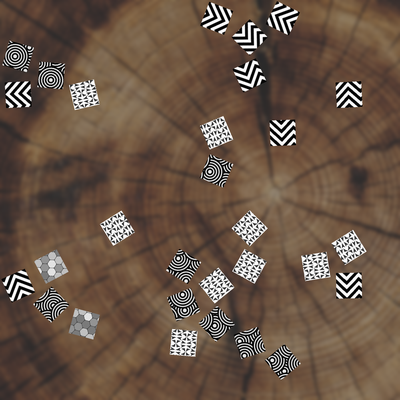

In [4]:
# Include the path to the folder containing the images of the project description:
PATH_EXAMPLE = "data_project/train2/"

# Show the images in the notebook:
def show_image(image: Union[str, np.ndarray]):
    if isinstance(image, str):
        image = PIL.Image.open(image)
    # display images in smaller size:
    image.thumbnail((400, 400), PIL.Image.LANCZOS)
    display(image)

# Show the images from the PATH_EXAMPLE folder:
def show_example_images():
    for image_path in glob(PATH_EXAMPLE + "*.png"):
        # show only the first image example:
        show_image(image_path)
        break

show_example_images()

---
## 0. Introduction

In this project, you will be working on solving tiling puzzles using image analysis and pattern recognition techniques. Tiling puzzles are a classic type of puzzle game that consists of fitting together pieces of a given shape (in this case squared to form a complete image. The goal of this project is to develop an algorithm that can automatically reconstruct tiling puzzles from a single input image. 

---

## 1. Data

### Input data
To achieve your task, you will be given images that look like this:

<img src="data_project/project_description/train_00.png" width="512"/>


### Example puzzle content
Example of input of solved puzzles. 
Solution 1
<img src="data_project/project_description/solution_example.png" width="512"/>
\\
Solution 2
<img src="data_project/project_description/solution_example2.jpg" width="512"/>


### 1.1. Image layout

- The input for the program will be a single image with a size of __2000x2000 pixels__, containing the pieces of the tiling puzzles randomly placed in it. The puzzles sizes vary from __3x3, 3x4, or 4x4__ size. 
    -__You are guaranteed to always have the exact number of pieces for each puzzle__ 
        -For each puzzle you always are expected to find exaclty 9,12,16 pieces
        -If you find something else, either you are missing pieces, or added incorrect pieces for the puzzle

- The puzzle pieces are square-shaped with dimensions of 128x128 pixels (before rotation). 

- The input image will contain pieces from __two or three (but never four)__ different tiling puzzles, as well as some __extra pieces (outliers)__ that do not belong to either puzzle.


## 2. Tasks (Total 20 points) 


The project aims to:
1) Segment the puzzle pieces from the background (recover the pieces of 128x128 pixels)   \[ __5 points__ \] 

2) Extract features of interest from puzzle pieces images \[ __5 points__ \]   

3) Cluster puzzle pieces to identify which puzzle they belong, and identify outliers.  \[ __5 points__ \]   

4) Solve tiling puzzle (find the rotations and translations to correctly allocate the puzzle pieces in a 3x3, 3x4 or 4x4 array.) \[ __5 points__ \]   

##### The images used for the puzzles have self-repeating patterns or textures, which ensures that all puzzle pieces contain more or less the same features regardless of how they were cut. 




### 1.2. Output solution pieces.

For each input image, the output solution will include N images with solved puzzles, where N is the number of puzzles in the input image and M images, and each of these images will contain the solved solution to one of the N puzzles in the input. 


-  Example input:  train_05.png

- Example solution:
        -solution_05_00.png solution_05_01.png solution_05_02.png 
        -outlier_05_00.png outlier_05_01.png outlier_05_02.png ...

- Example input:  train_07.png
- Example solution:
        -solution_07_00.png solution_07_01.png 
        -outlier_07_00.png outlier_07_01.png outlier_07_02.png ...


__Watch out!__ output resolution should always be like this:  
<table ><tr><th >Puzzle pieces <th><th> pixel dimentions <th> <th> pixel dimentions <th> <tr>
<tr><td> 3x3 <td><td> 384x384 <td><td> 3(128)x3(128) <td> <tr>
<tr><td> 3x4 <td><td> 384x512 <td><td> 3(128)x4(128)<tr>
<tr><td> 4x4 <td><td> 512x512 <td><td> 4(128)x4(128)<tr>
<tr><td> 1x1 (outlier)<td><td> 128x128 <td><td> (1)128x(1)128 <td><tr><table>





__Order of the solutions (and rotations) it's not a problem for the grading__




the output solution will be a final image of resolution (1283)x(1283), with each piece correctly placed in its corresponding location in the 3x3 array. Similarly, if the puzzle consists of 3x4 or 4x4 pieces, the output solution will be an image of resolution (1283)x(1284) or (1284)x(1284)



### 1.3 Data folder Structure

You can download the data for the project here: [download data](https://drive.google.com/drive/folders/1k3xTH0ZhpqZb3xcZ6wsOSjLzxBNYabg3?usp=share_link)

```
data_project
│
└─── project_description
│    │    example_input.png      # example input images
│    │    example_textures1.png      # example input images
│    │    example_textures2.png      # example input images
│    └─── ultimate_test.jpg   # If it works on that image, you would probably end up with a good score
│
└─── train
│    │    train_00.png        # Train image 00
│    │    ...
│    │    train_16.png        # Train image 16
│    └─── train_labels.csv    # Ground truth of the train set
|    
└────train_solution
│    │    solution_00_00.png        # Solution puzzle 1 from Train image 00
│    │    solution_00_01.png        # Solution puzzle 2 from Train image 00
│    │    solution_00_02.png        # Solution Puzzle 3 from Train image 00
│    │    outlier_00_00.png         # outlier     from Train image 00
│    │    outlier_00_01.png         # outlier     from Train image 00
│    │    outlier_00_03.png         # outlier     from Train image 00
│    │    ...
│    │    solution_15_00.png        # Solution puzzle 1 from Train image 15
│    │    solution_15_01.png        # Solution puzzle 2 from Train image 15
│    │    outlier_15_00.png         # outlier     from Train image 15
│    └─── outlier_15_01.png         # outlier     from Train image 15
│
└─── test
     │    test_00.png         # Test image 00 (day of the exam only)
     │    ...
     └─── test_xx.png             # Test image xx (day of the exam only)
```



## 3. Evaluation

**Before the exam**
   - Create a zipped folder named **groupid_xx.zip** that you upload on moodle (xx being your group number).
   - Include a **runnable** code (Jupyter Notebook and external files) and your presentation in the zip folder.
   
**The day of the exam**
   - You will be given a **new folder** (test folder) with few images, but **no ground truth** (no solutions).
   - We will ask you to run your pipeline in **real time** and to send us your prediction of the task you obtain with the provided function **save_results**. 
   - On our side, we will compute the performance of your classification algorithm. 
   - To evaluate your method, we will use the **evaluate_solution** function presented below. To understand how the provided functions work, please read the documentation of the functions in **utils.py**.
   - **Please make sure your function returns the proper data format to avoid points penalty on the day of the exam**. 
---


## 4. Your code

In [260]:
## load images
import os 
from PIL import Image
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import binary_fill_holes

# 1. Segment the puzzle pieces from the background

Utils functions (Loading images and saving the solution puzzles)

In [6]:
def load_input_image(image_index,  folder ="train2", path = "data_project"):
    
    filename = "train_{}.png".format(str(image_index).zfill(2))
    path_solution = os.path.join(path,folder, filename )
    
    im= Image.open(os.path.join(path,folder,filename)).convert('RGB')
    im = np.array(im)
    return im

def save_solution_puzzles(image_index , solved_puzzles, outliers, folder ="train2", path = "data_project", group_id = 0):
    
    path_solution = os.path.join(path,folder + "_solution_{}".format(str(group_id).zfill(2)))
    if not  os.path.isdir(path_solution):
        os.mkdir(path_solution)

    print(path_solution)
    for i, puzzle in enumerate(solved_puzzles):
        filename =os.path.join(path_solution, "solution_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(puzzle).save(filename)

    for i , outlier in enumerate(outliers):
        filename =os.path.join(path_solution, "outlier_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(outlier).save(filename)


Apply Morphologicals operators to fill the holes / get rid the noise 

In [258]:
def apply_may_morph(mask):
    """
    Apply morphological operations to the mask to remove noise and fill in holes
    """
    #kernel_dilate = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # dilate the mask to fill in holes
    #kernel_erode = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6)) # erode the mask to get rid of noise
    #kernel_close =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) # close the mask
    #kernel_open = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(5,5)) # open the mask

    #mask_dilate = cv2.dilate(mask.astype(np.uint8), kernel_dilate, iterations=9)
    #mask_erode = cv2.erode(mask_dilate, kernel_erode, iterations=7)
    #mask_open = cv2.morphologyEx(mask_erode, cv2.MORPH_OPEN, kernel_open, iterations=6)
    #mask_close = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel_close, iterations=6)

    # 1. Close the image:
    kernel_close =cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3)) # close the mask

    mask_close = cv2.morphologyEx(mask.astype(np.uint8), cv2.MORPH_CLOSE, kernel_close, iterations=6)

    #2. Binary fill holes:
    mask_erode = binary_fill_holes(mask_close).astype(np.uint8)

    return mask_erode

Segment the image using Canny edge detection.

In [259]:
def segment_image_canny(img):
    """
    Segment the image to retrieve the tiles.
    """
    # 1. Convert the image to grayscale:
    train_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    # 2. Apply Canny edge detection:
    auto = cv2.Canny(train_gray, 35, 40)

    return auto

Get the contours of the objects in the mask.

In [252]:
def get_contours(img, mask):
    """
    Get the contours of the objects in the mask
    """
    #mask = cv2.cvtColor(mask, cv2.COLOR_RGB2GRAY)
    mask = mask
    contours, hierarchy = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)
    contours = [cnt for cnt in contours if cv2.contourArea(cnt) > 1000]

    final_contours = []
    coords = []
    im_draw = img.copy()
    tiles = []

    for cnt in contours:
        # cnt is a list of points of the contour of a tile (x,y) coordinates of the contour, ordered clockwise
        x1, y2 = cnt[0][0] # top left corner
        approx = cv2.approxPolyDP(cnt, 0.09*cv2.arcLength(cnt, True), True) # approximate the contour with accuracy proportional to the contour perimeter

        if len(approx) <= 4: # if the contour has 4 corners
            rect = cv2.minAreaRect(cnt) # get the rectangle that encloses the contour
            (x, y), (w, h), a = rect # get the coordinates of the center, width, height, and angle of rotation of the rectangle
            ratio = float(w)/h # compute the ratio of the width to the height of the rectangle
            if 0.8 < ratio < 1.2: # if the ratio is close to 1, the rectangle is a square, and the contour is a tile
                # the order of the box points: bottom left, top left, top right,
                # bottom right
                box = cv2.boxPoints(rect) # get the coordinates of the corners of the rectangle
                box = np.int0(box) # convert the coordinates to integers
                if cv2.contourArea(box) > 7000: # if the area of the rectangle is large enough, the contour is a tile
                    im_draw = cv2.drawContours(im_draw, [box], 0, (0, 255, 0), 4) # draw contours in green color
                     # get width and height of the detected rectangle
                    width = int(rect[1][0])
                    height = int(rect[1][1])
                    src_pts = box.astype("float32")
                    # coordinate of the points in box points after the rectangle has been
                    # straightened
                    dst_pts = np.array([[0, height-1],
                            [0, 0],
                            [width-1, 0],
                            [width-1, height-1]], dtype="float32")

                    # the perspective transformation matrix
                    M = cv2.getPerspectiveTransform(src_pts, dst_pts)

                    # directly warp the rotated rectangle to get the straightened rectangle
                    warped = cv2.warpPerspective(img, M, (width, height))
                    tiles.append(warped)
                    final_contours.append(box) # add the coordinates of the corners of the rectangle to the list of contours
                    coords.append(box[0]) # get the coordinates of the top left corner of the rectangle
            else:
                im_draw = cv2.drawContours(im_draw, [cnt], 0, (255, 0, 0), 4) # draw contours in red color

    return final_contours, coords, im_draw, tiles

## Load the input images, apply the k-means segmentation, apply morphological operators, get the tiles and plot the contours obtained 

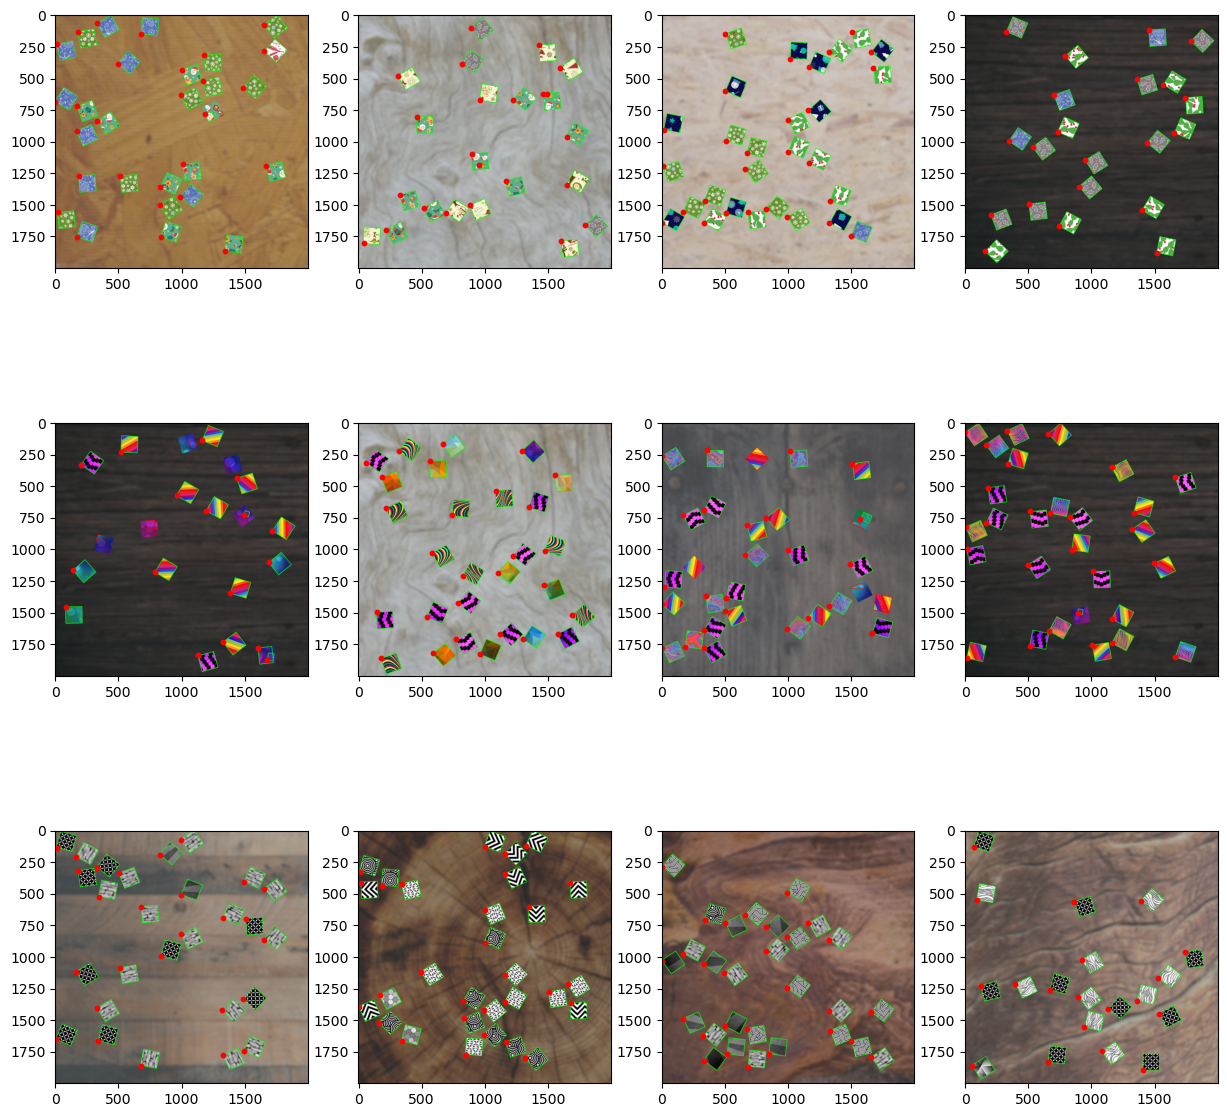

In [245]:
ls = [str(i) for i in range(12)]
# fig, ax = plt.subplot_mosaic([ls], figsize=(15, 15))
fig, axs = plt.subplots(3, 4, figsize=(15, 15))

for i, ax in enumerate(axs.flatten()):
    im = load_input_image(i)
    md = segment_image_canny(im)
    res = apply_may_morph(md)
    final_contours, coords, im_draw, tiles = get_contours(im, res)
    
    ax.imshow(im_draw)
    ax.scatter([x for x,y in coords], [y for x,y in coords], c='r', s=10)

#### Non-working images : 

Image # 0:

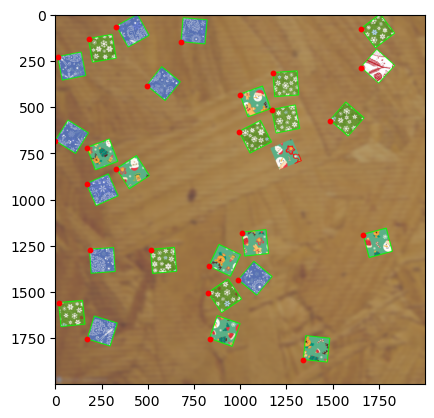

In [255]:
im = load_input_image(0)
md = segment_image_canny(im)
res = apply_may_morph(md)
final_contours, coords, im_draw, tiles = get_contours(im, res)
plt.imshow(im_draw)
plt.scatter([x for x,y in coords], [y for x,y in coords], c ='r', s=10)

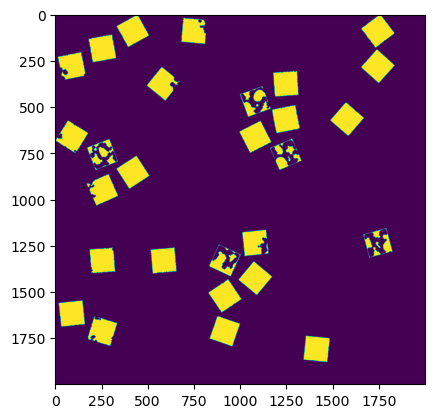

In [256]:
plt.imshow(res)

Image #4 : 

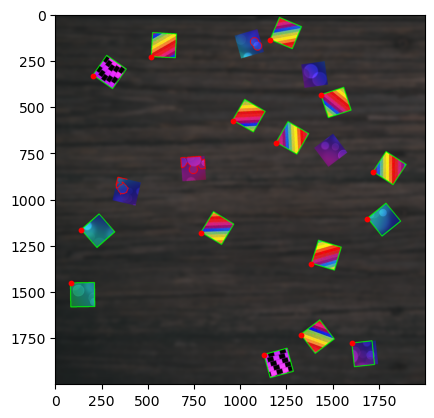

In [220]:
im = load_input_image(4)
md = segment_image_canny(im)
res = apply_may_morph(md)
final_contours, coords, im_draw, tiles = get_contours(im, res)
plt.imshow(im_draw)
plt.scatter([x for x,y in coords], [y for x,y in coords], c ='r', s=10)

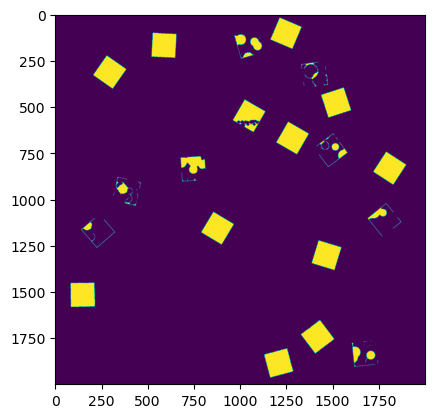

In [221]:
plt.imshow(res)

Image #6

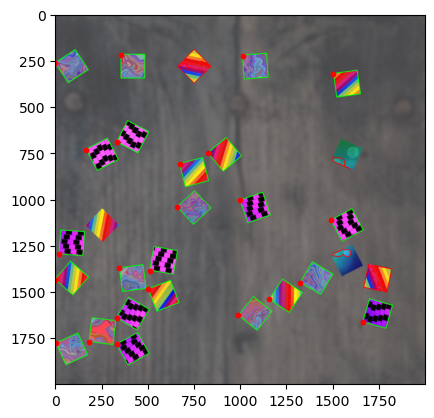

In [217]:
im = load_input_image(6)
md = segment_image_canny(im)
res = apply_may_morph(md)
final_contours, coords, im_draw, tiles = get_contours(im, res)
plt.imshow(im_draw)
plt.scatter([x for x,y in coords], [y for x,y in coords], c ='r', s=10)

Image # 7

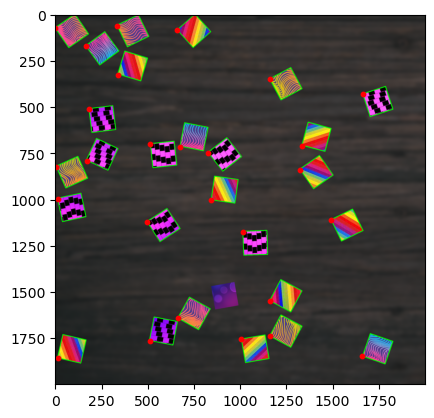

In [238]:
im = load_input_image(7)
md = segment_image_canny(im)
res = apply_may_morph(md)
final_contours, coords, im_draw, tiles = get_contours(im, res)
plt.imshow(im_draw)
plt.scatter([x for x,y in coords], [y for x,y in coords], c ='r', s=10)

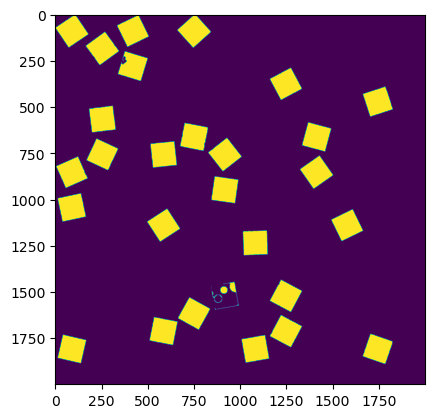

In [239]:
plt.imshow(res)

#### Plot the tiles from the first image 

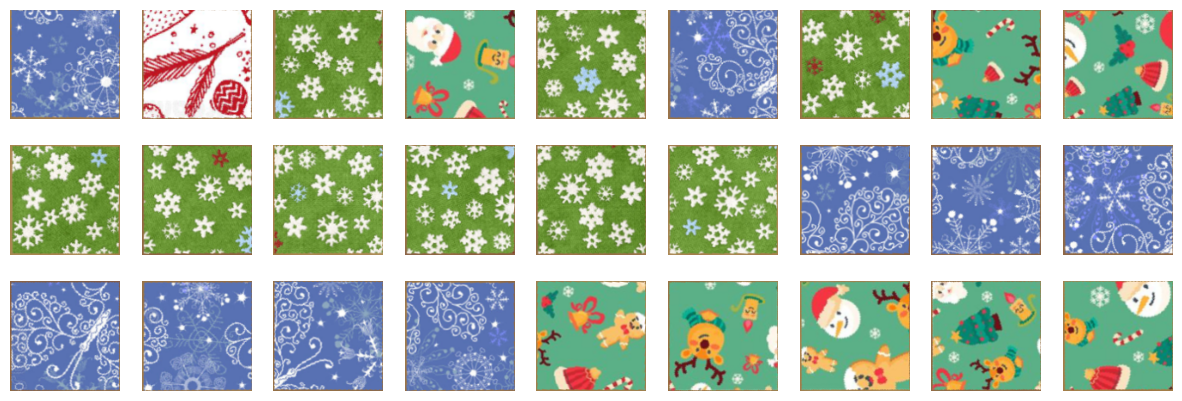

In [257]:
# Show the subplot of the 27 tiles obtained from the first image:
fig, axes = plt.subplots(3, 9, figsize=(15, 5))
for i, ax in enumerate(axes.flatten()):
    #print(tiles[i].shape)
    # resize the images to 128x128 pixels:
    tiles[i] = cv2.resize(tiles[i], (128, 128))
    ax.imshow(tiles[i])
    ax.set_axis_off()
plt.show()

#### Get the tiles from the folder "tiles"

In [261]:
def get_tiles(image_index, folder_image = "train2", folder ="tiles", path = "data_project"):
    im = load_input_image(image_index, folder_image, path)
    md = segment_image_canny(im)
    res = apply_may_morph(md)
    _, _, _, tiles = get_contours(im, res)
    num_tiles = len(tiles)
    # Extract the tiles as 128x128 images and save them in folder "tiles" in .png format:
    for i, tile in enumerate(tiles):
        filename = os.path.join(path, folder, "tile_{}_{}.png".format(str(image_index).zfill(2), str(i).zfill(2)))
        Image.fromarray(tile).save(filename)

    return tiles, num_tiles

In [280]:
all_imgs_tiles = []
all_imgs_num_tiles = []
for i in range(12): # there are 12 images in the folder "train2"
    tiles, num_tiles = get_tiles(i)
    all_imgs_tiles.append(tiles)
    all_imgs_num_tiles.append(num_tiles)

# 2. Extract features of interest from puzzle pieces images

## Gabor filters

$$ gb(x,y) = \exp \left( -\frac{1}{2} \left( \frac{x_{\theta}^2}{\sigma^2} + \frac{y_{\theta}^2}{(\Gamma\sigma)^2} \right) \right) \cos \left( \frac{2 \pi}{\lambda} x_{\theta} + \psi \right) $$


In [263]:
from skimage.filters import gabor
# import skewness and kurtosis from scipy.stats:
from scipy.stats import skew, kurtosis
from skimage.filters import gabor_kernel
from scipy import ndimage as ndi

In [264]:
def get_hist_features(image, bins=32):
    red = np.histogram(image[:, :, 0], bins=bins)[0]
    green = np.histogram(image[:, :, 1], bins=bins)[0]
    blue = np.histogram(image[:, :, 2], bins=bins)[0]
   
    vector = np.concatenate([red, green, blue], axis=0)
    vector = vector.reshape(-1)
    return vector

In [265]:
def get_hsv_features(image, bins = 32):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    return get_hist_features(image, bins)

In [266]:
def compute_gabor_feats(image, kernels):
    image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    feats = np.zeros((len(kernels), 8), dtype=np.double)
    for k, kernel in enumerate(kernels):
        filtered = ndi.convolve(image, kernel, mode='wrap') # mode = 'wrap' to avoid border effects
        feats[k, 0] = filtered.mean()
        feats[k, 1] = filtered.var()
        feats[k, 2] = skew(filtered.flatten())
        feats[k, 3] = kurtosis(filtered.flatten())
        feats[k, 4] = filtered.max()
        feats[k, 5] = filtered.min()
        feats[k, 6] = filtered.std()
        # Add power spectrum:
        spectrum = np.abs(np.fft.fft2(filtered))
        feats[k, 7] = np.sum(spectrum**2)
    return feats

In [267]:
# prepare filter bank kernels
kernels = []
for theta in range(4):
    theta = theta / 4. * np.pi
    for sigma in (1, 3):
        for frequency in (0.05, 0.25):
            kernel = np.real(gabor_kernel(frequency, theta=theta,
                                          sigma_x=sigma, sigma_y=sigma))
            kernels.append(kernel)

In [268]:
# Compute color and gabor features for all tiles:
all_imgs_features = []
nbins = 16
for i in range(len(all_imgs_tiles)):
    num_tiles = all_imgs_num_tiles[i]
    img_features = np.zeros((num_tiles, 8*len(kernels)+3*nbins))
    # fig, axes = plt.subplots(1, num_tiles, figsize=(15, 5))
    for j in range(num_tiles):
        tile = all_imgs_tiles[i][j]
        rgb_feats = get_hist_features(tile, bins=nbins)
        # hsv_feats = get_hsv_features(tile, bins=nbins)
        #plot the color histogram for every j:
        # axes[j].bar(np.arange(3*nbins), color_feats)
        gabor_feats = compute_gabor_feats(tile, kernels)
        img_features[j, :] = np.concatenate([rgb_feats, gabor_feats.flatten()])
        # print(f'Image: {i} Tile: {j} Color feats: {color_feats.shape} Gabor feats: {gabor_feats.shape} All feats: {img_features[-1].shape}')
    all_imgs_features.append(img_features)
    



In [177]:
# kernels[0].shape
# tiles[0].shape
# features.shape
# len(kernels)
# # reshape features to 1D array (128,1):
# features = features.flatten()
# features.reshape(128,1).shape
# features

In [296]:
# Load the tiles from the training image 1:
# tiles = []
# for i in range(28):
#     tile = Image.open("data_project/tiles/tile_02_{}.png".format(str(i).zfill(2))).convert('RGB')
#     tile = np.array(tile)
#     #tile = cv2.imread("data_project/tiles/tile_00_{}.png".format(str(i).zfill(2)))
#     tiles.append(tile)
# len(tiles)
# tiles_original = tiles.copy()

In [269]:
# plot the first tiles of tiles_original:
plt.imshow(tiles_original[0])
print(tiles_original[0].shape)

NameError: name 'tiles_original' is not defined

In [297]:
# feature_maps = np.zeros((len(tiles), len(kernels)*8))
# for i, tile in enumerate(tiles):
#     # Transform the tile to grayscale:
#     tile = cv2.cvtColor(tiles[i], cv2.COLOR_RGB2GRAY) # cv2.COLOR_RGB2GRAY
#     features = compute_feats(tile, kernels)
#     #print(features.shape)
#     features = features.flatten()
#     feature_maps[i,:] = features 
# print(feature_maps.shape)

(28, 128)


In [270]:
# import KMeans:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [271]:
def choose_k(feature_maps):
    """ This function uses Silhouette analysis to choose the optimal number of clusters k"""
    # Create a range of clusters to test:
    ks = range(3, 6)
    # Initialize the silhouettes array:
    silhouettes = []
    # Loop over different values of k:
    for k in ks:
        # Create a KMeans instance with k clusters:
        kmeans = KMeans(n_clusters=k)
        # Fit the model on the features:
        kmeans.fit(feature_maps)
        # Compute the silhouette score for this model:
        score = silhouette_score(feature_maps, kmeans.labels_)
        # Append the score to the silhouettes array:
        silhouettes.append(score)
    # Plot the silhouette scores:
    plt.plot(ks, silhouettes, '-o')
    plt.xlabel('number of clusters, k')
    plt.ylabel('silhouette score')
    plt.xticks(ks)
    plt.show()
    # Return the optimal value of k:
    return np.argmax(silhouettes) + ks[0]

In [272]:
def chose_k(feature_maps):
    """ This functions applies Elbow method to find the optimal k for k-means clustering
    and returns the optimal k."""
    distortions = []
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k)
        kmeanModel.fit(feature_maps)
        distortions.append(kmeanModel.inertia_)
    # Plot the elbow:
    plt.figure(figsize=(16,8))
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    
    

In [273]:
def cluster(feature_maps, n_clusters=4):
    # cluster the feature vectors using k-means and elbow method to find the optimal number of clusters:
    # normalize the feature vectors:
    feature_maps = feature_maps - np.mean(feature_maps, axis=0)
    feature_maps = feature_maps / np.std(feature_maps, axis=0)
    # replace NaN values with 0:
    feature_maps = np.nan_to_num(feature_maps)
    # apply k-means clustering to the feature maps:
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(feature_maps)
    # get the labels of the clusters
    labels = kmeans.labels_
    # get the centroids of the clusters
    centroids = kmeans.cluster_centers_
    return labels, centroids

In [274]:
def plot_clusters(labels, tiles_original):
    """ This functions retrieve the tiles images according to their cluster label and plot them in a subplot"""
    # create a list of tiles for each cluster:
    clusters = []
    for i in range(len(np.unique(labels))):
        clusters.append([tiles_original[j] for j in range(len(tiles_original)) if labels[j] == i])
        #print(clusters)
    # plot a subplot of the tiles for each cluster:
    for i in range(len(clusters)):
        fig, axes = plt.subplots(1, len(clusters[i]), figsize=(15, 5))
        if len(clusters[i]) == 1:
            axes.imshow(clusters[i][0])
            axes.set_axis_off()
        else :
            for j, ax in enumerate(axes.flatten()):
                ax.imshow(clusters[i][j])
                ax.set_axis_off()
            plt.show()

In [275]:
all_imgs_features[0].shape

(27, 176)

In [276]:
feature_map = all_imgs_features[2]
# K = choose_k(feature_map)


In [145]:
l,c = np.unique(labels, return_counts=True)
for i in range(len(l)):
    # check if each cluster has a number of tiles divisible by 3:
    if c[i] % 3 != 0:
        K = 4
        break
    

(array([0, 1, 2]), array([10,  9,  9], dtype=int64))

/var/folders/87/b39tprrs4vgb71j5qj9sq5hw0000gn/T/ipykernel_49555/1636458688.py:5: RuntimeWarning: invalid value encountered in divide
  feature_maps = feature_maps / np.std(feature_maps, axis=0)
/var/folders/87/b39tprrs4vgb71j5qj9sq5hw0000gn/T/ipykernel_49555/1636458688.py:5: RuntimeWarning: invalid value encountered in divide
  feature_maps = feature_maps / np.std(feature_maps, axis=0)


cluster 1 has 10 tiles
[0 3 2 0 3 0 0 2 0 0 3 0 0 0 2 2 2 3 3 3 3 3 2 2 2 2 3 3]


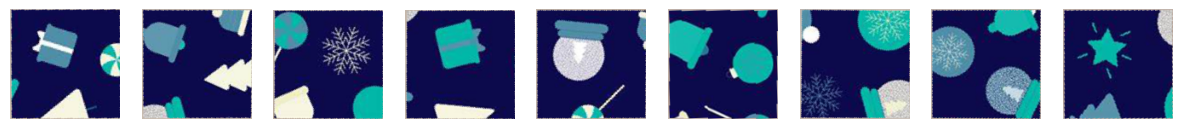

ValueError: Number of columns must be a positive integer, not 0

<Figure size 1500x500 with 0 Axes>

In [277]:
# To choose K, we hypothesize that each image has at least 3 clusters (2 puzzles + 1 of outliers OR 3 puzzles)
# We start by doing k_means clustering with K=3 and check if each cluster has a number of tiles divisible by 3:


N= 2
K = 3
feature_map = all_imgs_features[N]
# Plot the clusters:
labels, centroids = cluster(feature_map, n_clusters=K)
l,c = np.unique(labels, return_counts=True)
# plot_clusters(labels, all_imgs_tiles[N])
for i in range(len(l)):
    # check if each cluster has a number of tiles divisible by 3:
    if c[i] % 3 != 0 and c[i] >9:
        print("cluster {} has {} tiles".format(l[i], c[i]))
        # get the cluster where this happens and recluster it with 2 clusters:
        feature_map = feature_map[labels == l[i]]
        labels_new, centroids = cluster(feature_map, n_clusters=2)
        # reassign the labels:
        labels_new[labels_new == 0] = l[i]
        labels_new[labels_new == 1] = l[-1] + 1
        labels[labels == l[i]] = labels_new

        break
print(labels)

plot_clusters(labels, all_imgs_tiles[N])

In [278]:
def get_features_Gabor(frequency, orientation, sigma, theta, tile):
    """ This functions extracts mean, std, kurtosis and other statistics from Gabor filter applied to the image"""

    
    gabor_filter_real, gabor_filter_imag = gabor(tile, frequency, orientation, sigma, theta, kernel_size)
    # show the real part of the filter:
    print(gabor_filter_real.shape)
    plt.imshow(gabor_filter_real, cmap='gray')
    # get the mean, standard deviation, skewness and kurtosis of the real part of the filter:
    mean = np.mean(gabor_filter_real)
    std = np.std(gabor_filter_real)
    skewness = skew(gabor_filter_real)
    kurt = kurtosis(gabor_filter_real)
    # power spectrum:
    power = gabor_filter_real ** 2
    return mean, std, skewness, kurt, power

In [ ]:
# Perform a grid search to find the best parameters for the Gabor filter:
def grid_search_Gabor():

    """ This functions performs a grid search of the best parameters for the Gabor filter from the training images"""



    

In [279]:
# Transform the tile to grayscale:
tile = cv2.cvtColor(tiles[0], cv2.COLOR_BGR2GRAY)
# Apply Gabor filter to the tile:
frequency = 0.6
orientation = 0
sigma = 2.0
theta = 0.5
kernel_size = 128
get_features_Gabor(frequency, orientation, sigma, theta, kernel_size, tile)

TypeError: get_features_Gabor() takes 5 positional arguments but 6 were given

In [20]:
def display_img(img, title, cmap=None):
    fig, ax = plt.subplots(1, len(img), figsize=(10, 10))
    ax.imshow(img, cmap)
    ax.axis('off')
    ax.set_title(title, fontsize=24)
    plt.show()

In [8]:
def solve_and_export_puzzles_image(image_index , folder = "train" , path = "data_project"  , group_id = "00"):
    """
    Wrapper function to load image and save solution
            
    Parameters
    ----------
    image:
        index number of the dataset

    Returns
    """

      # open the image
    image_loaded = load_input_image(image_index , folder = folder , path = path)
    #print(image_loaded)
    
   
    ## call functions to solve image_loaded
    solved_puzzles = [ (np.random.rand(512,512,3)*255).astype(np.uint8)  for i in range(2) ]
    outlier_images = [ (np.random.rand(128,128,3)*255).astype(np.uint8) for i in range(3)]
    
    save_solution_puzzles (image_index , solved_puzzles , outlier_images , folder = folder ,group_id =group_id)
    
   
    
    
    
    return image_loaded , solved_puzzles , outlier_images

im, sol , out = solve_and_export_puzzles_image(6 , group_id = 6)

data_project\train_solution_06


In [9]:
group_id = 0
# Evaluate all images
games_id = [6,10]  # to evaluate  three images

for i in games_id :
    
    print("solving " , i)
    # Saving results
    solve_and_export_puzzles_image(6 , group_id = group_id)

solving  6
data_project\train_solution_00
solving  10
data_project\train_solution_00


## Evaluation metrics

The evaluation metrics will be liberated in the following days. 
